In [1]:
# Import dependancies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
import pandas as pd

# Use a raw string by adding 'r' before the string to avoid the unicodeescape error
df = pd.read_csv("bodyfat.csv")


In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

Distribution plots for Density feature is shown below


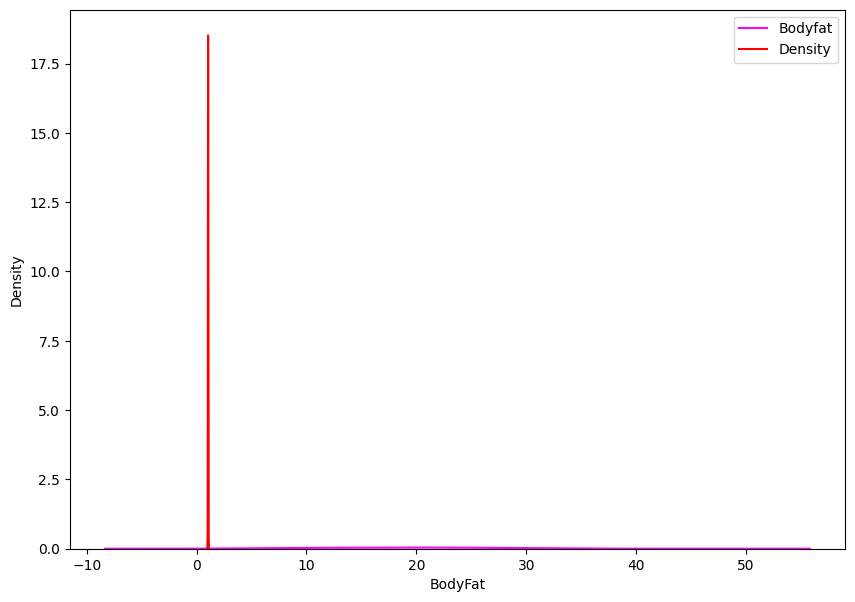

....................................................................................................
Distribution plots for BodyFat feature is shown below


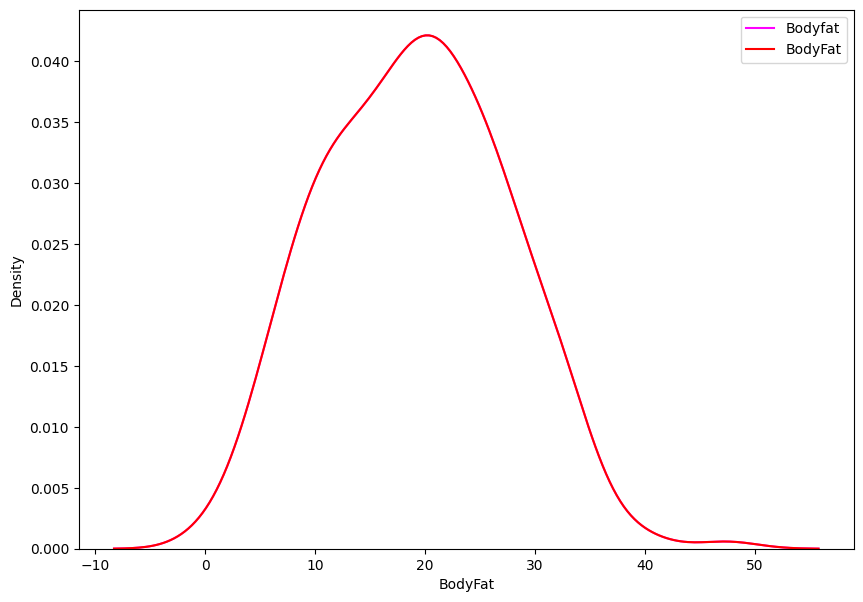

....................................................................................................
Distribution plots for Age feature is shown below


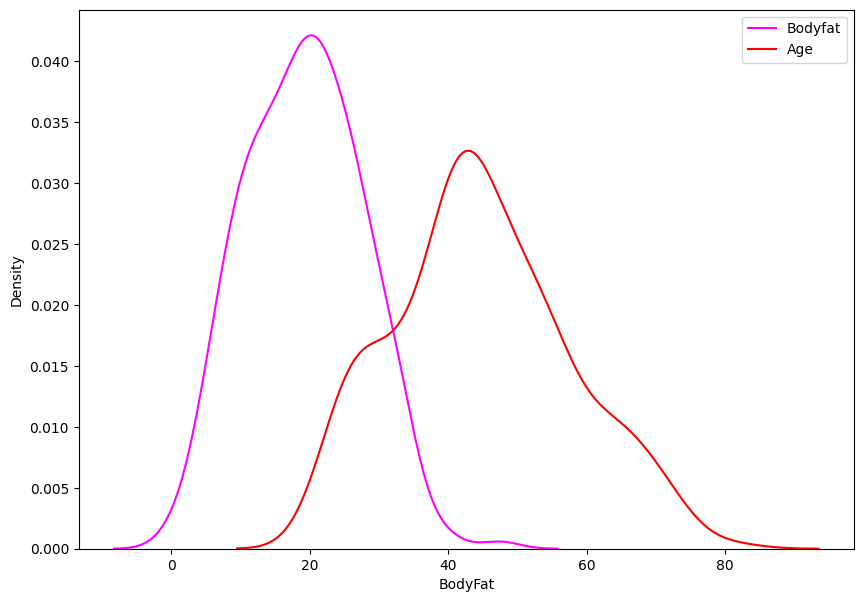

....................................................................................................
Distribution plots for Weight feature is shown below


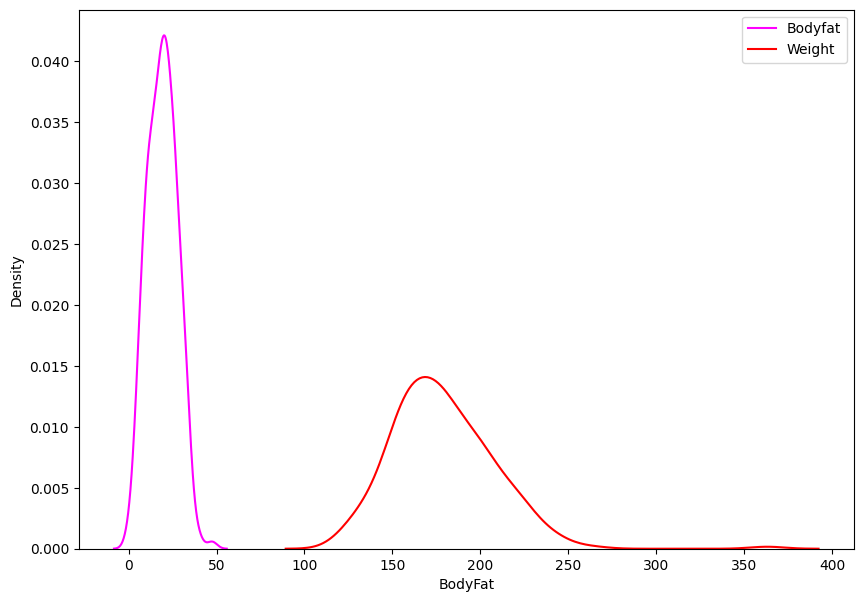

....................................................................................................
Distribution plots for Height feature is shown below


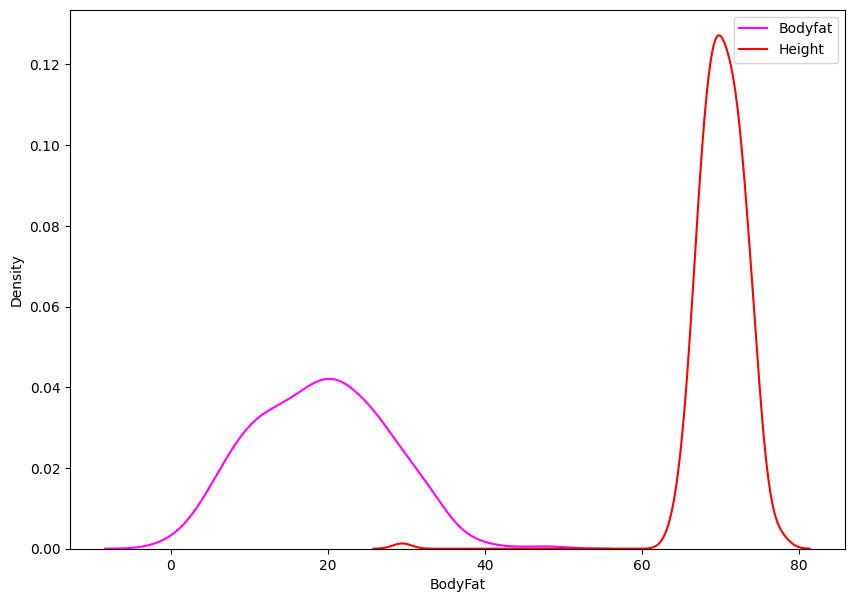

....................................................................................................
Distribution plots for Neck feature is shown below


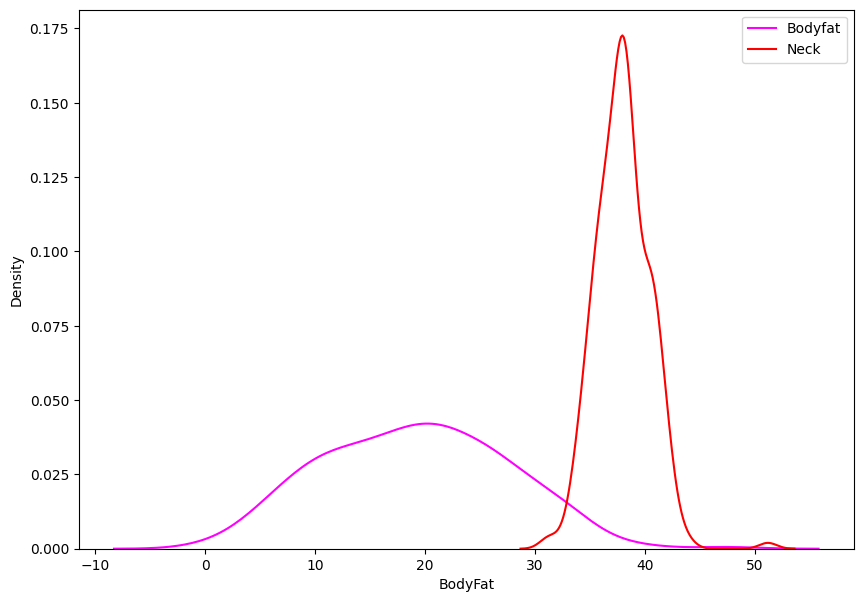

....................................................................................................
Distribution plots for Chest feature is shown below


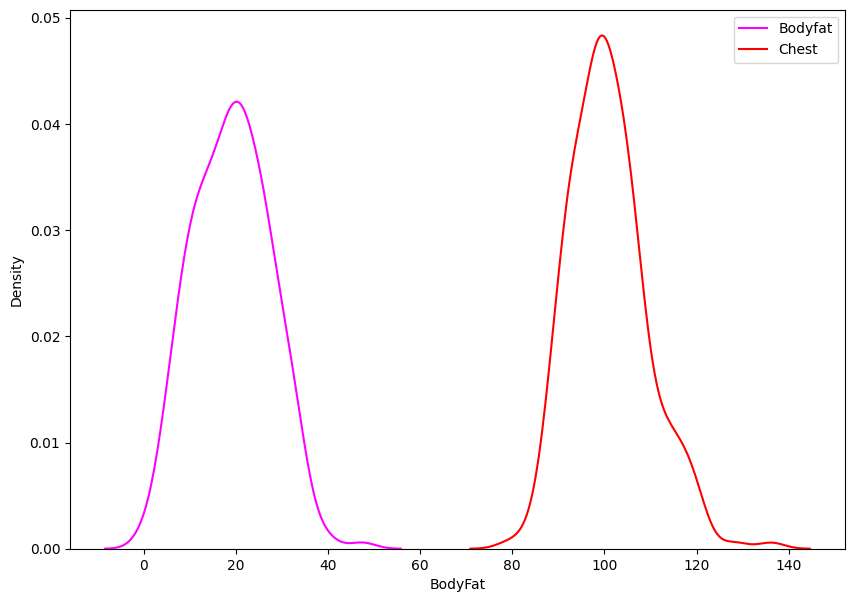

....................................................................................................
Distribution plots for Abdomen feature is shown below


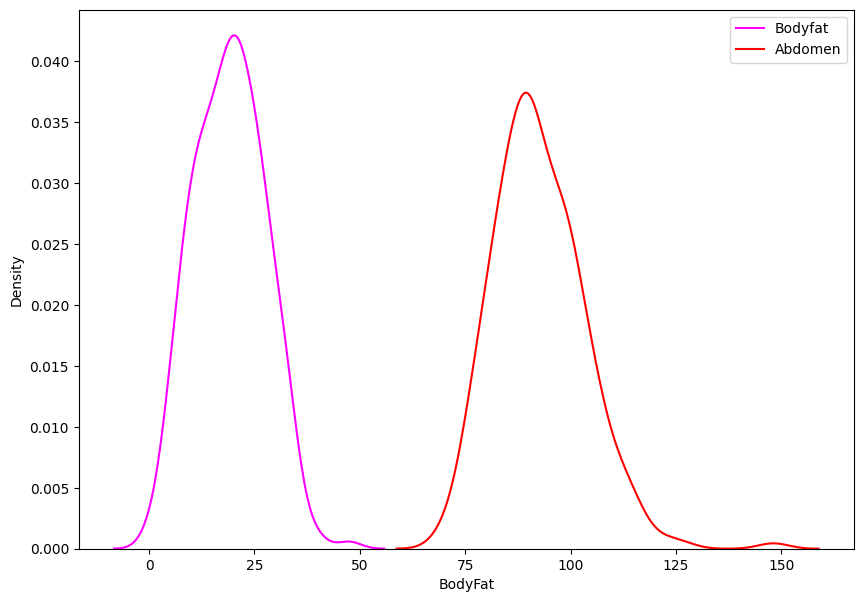

....................................................................................................
Distribution plots for Hip feature is shown below


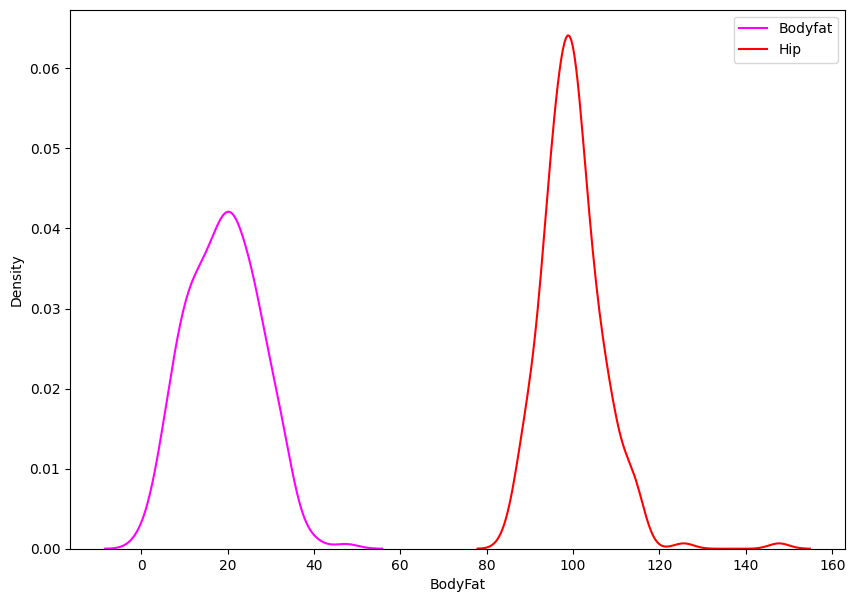

....................................................................................................
Distribution plots for Thigh feature is shown below


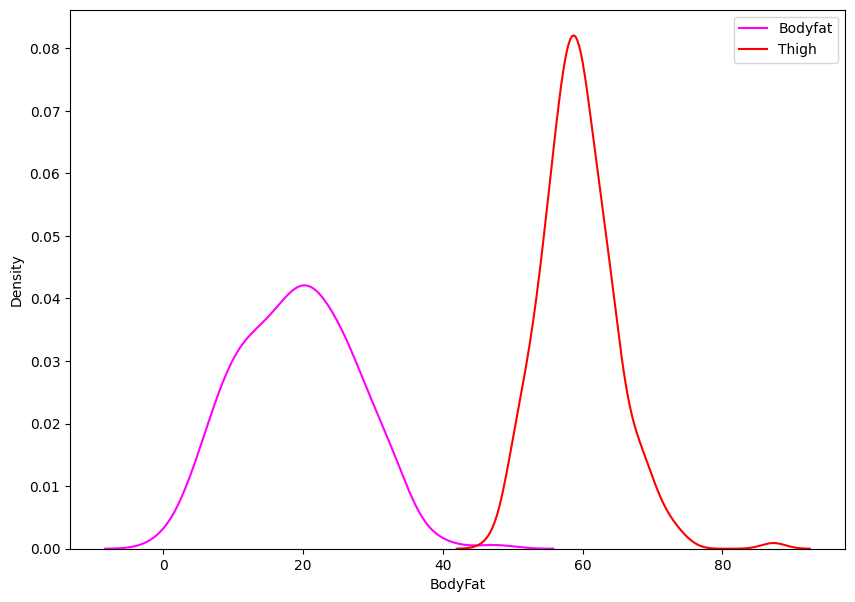

....................................................................................................
Distribution plots for Knee feature is shown below


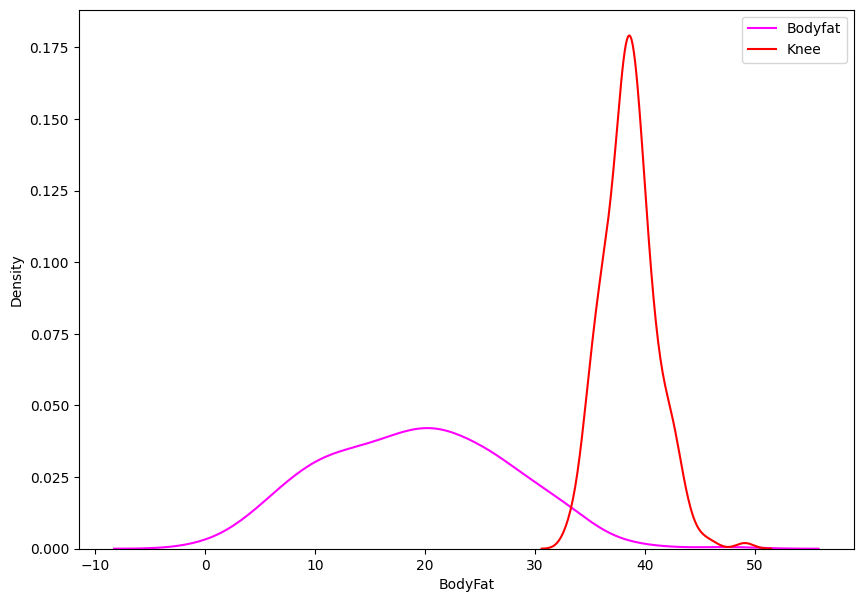

....................................................................................................
Distribution plots for Ankle feature is shown below


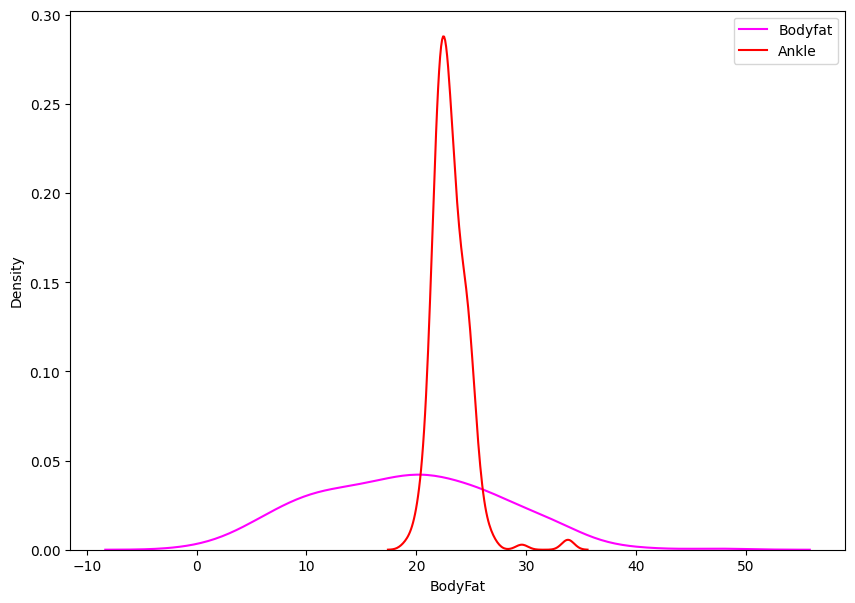

....................................................................................................
Distribution plots for Biceps feature is shown below


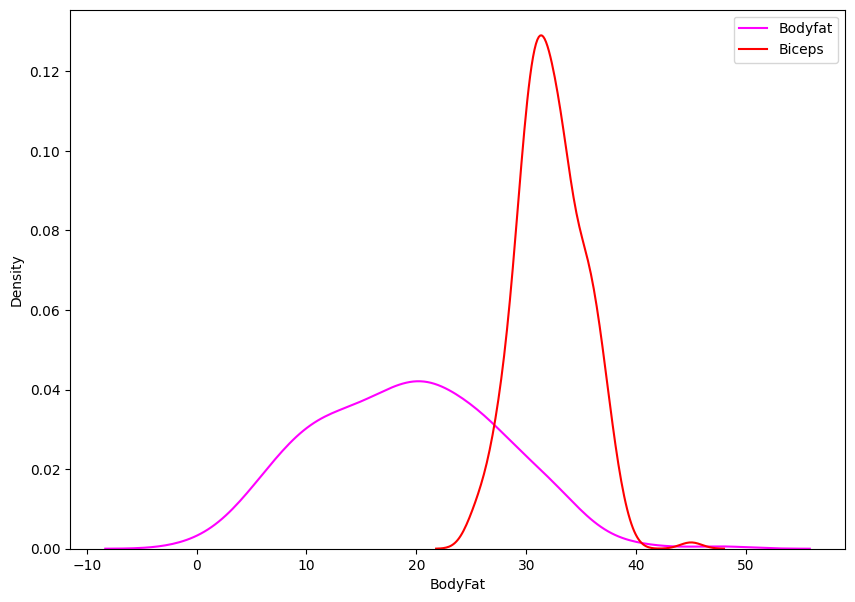

....................................................................................................
Distribution plots for Forearm feature is shown below


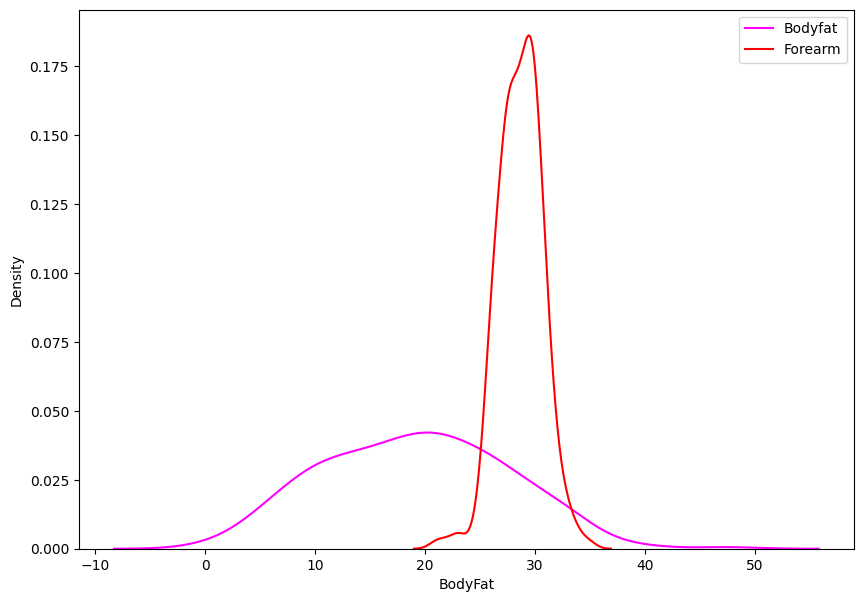

....................................................................................................
Distribution plots for Wrist feature is shown below


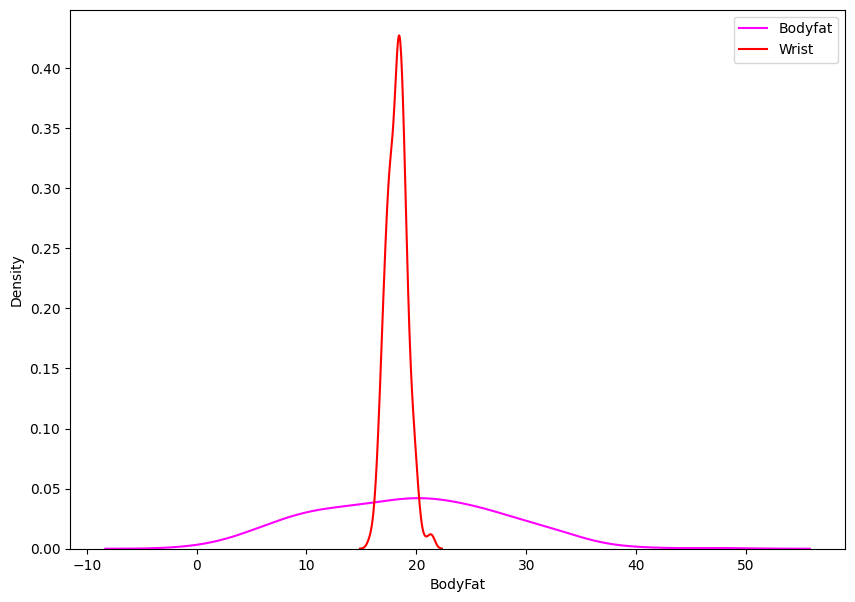

....................................................................................................


In [6]:
# define a distribution function
def plot_displots(col):
    
    plt.figure(figsize=(10, 7))
    sns.kdeplot(df["BodyFat"], color="magenta", 
                label="Bodyfat")
    sns.kdeplot(df[col], color="red", 
                label=col)
    plt.legend();
    plt.show()
    
cols =list(df.columns)
for i in cols:
    print(f"Distribution plots for {i} feature is shown below")
    plot_displots(i);
    print("."*100);

### Distribution Analysis

We will visualize how the data are centralized. And use boxplot to find out outliers.



Distribution plots for the feature Density are shown below 


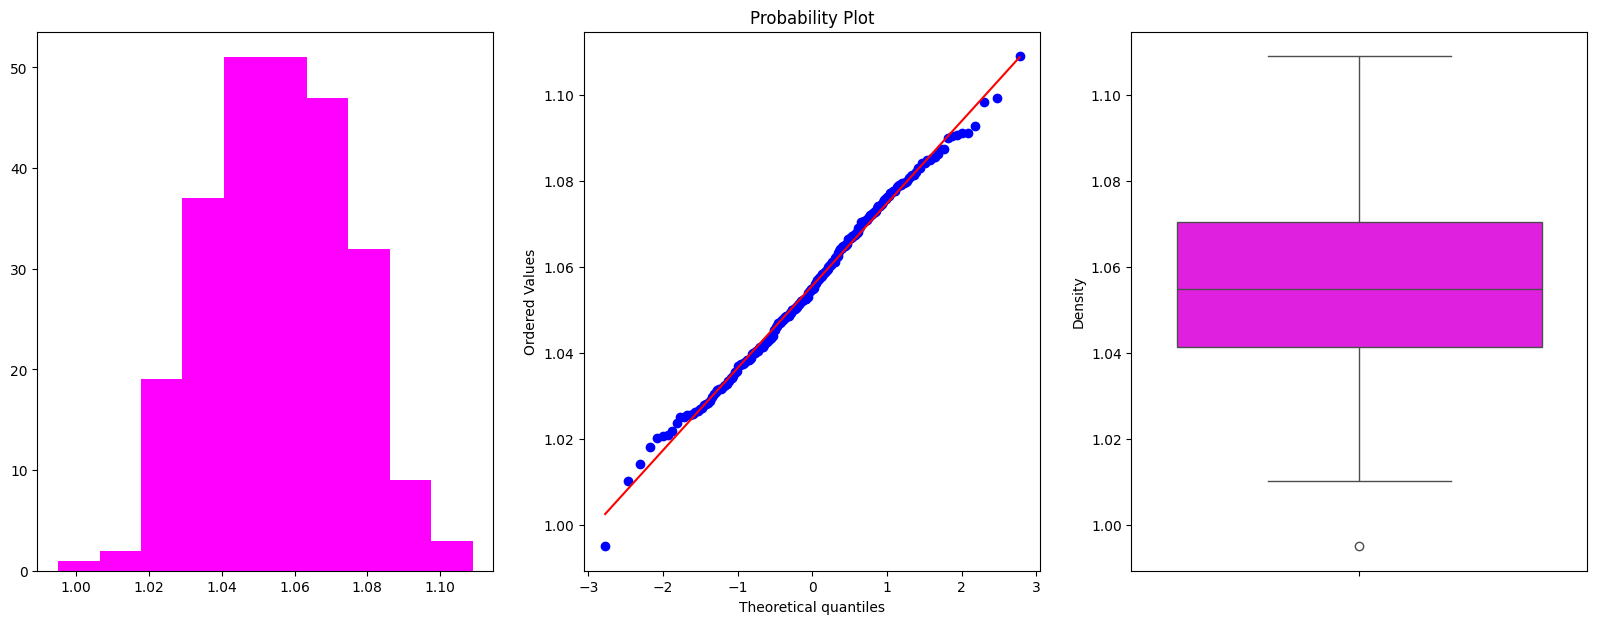

....................................................................................................
Distribution plots for the feature BodyFat are shown below 


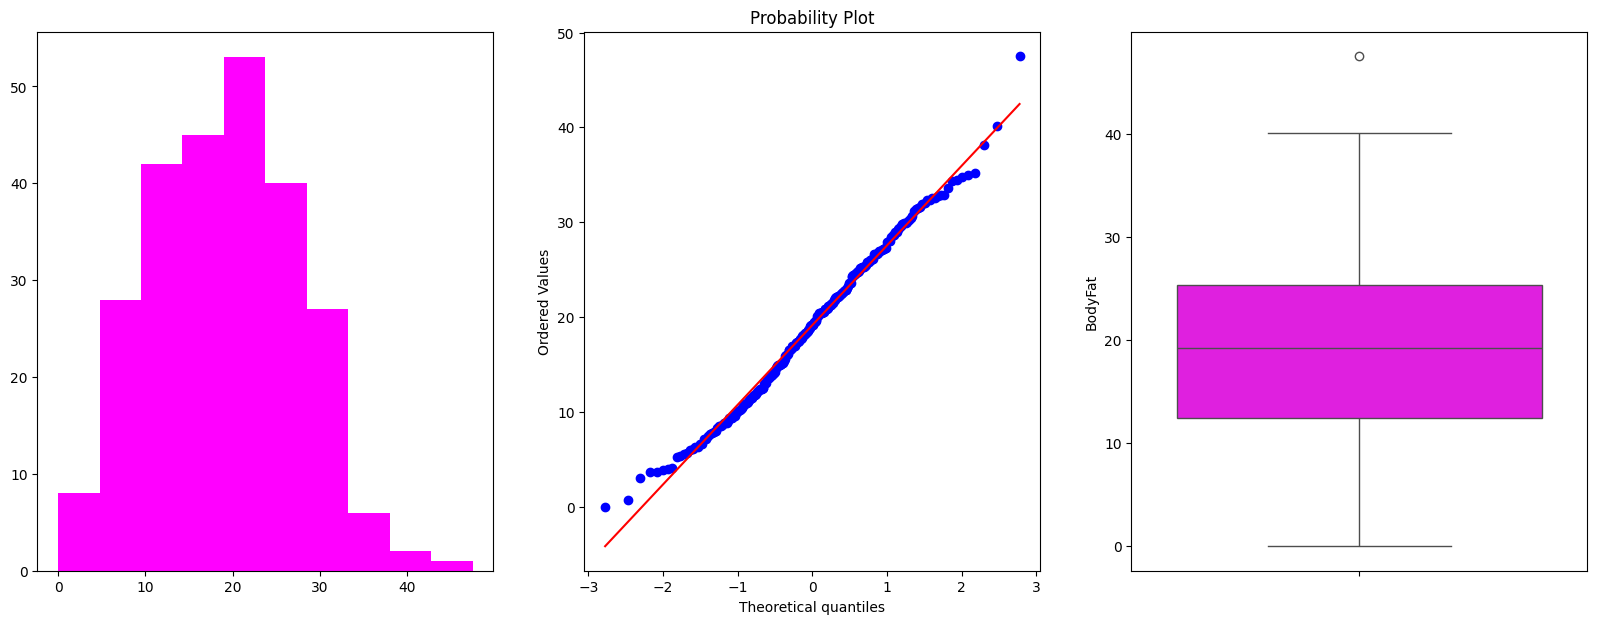

....................................................................................................
Distribution plots for the feature Age are shown below 


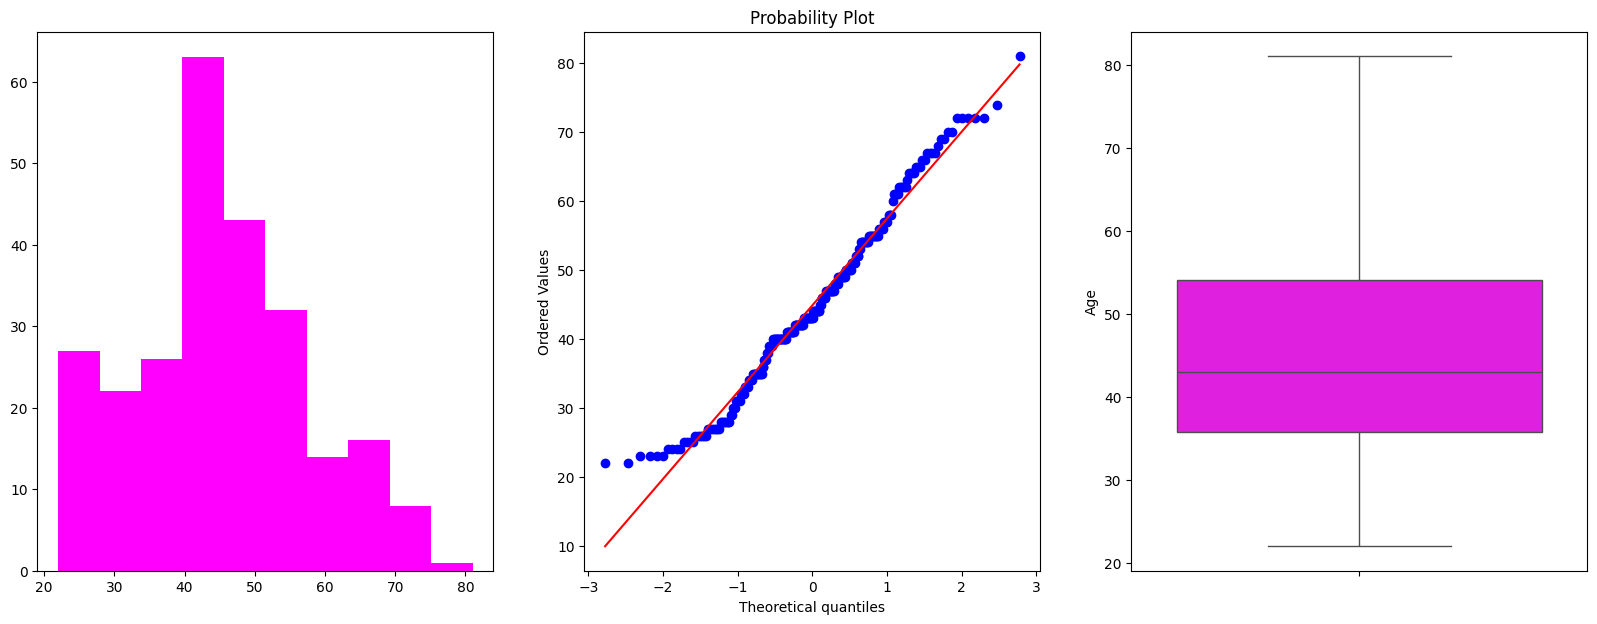

....................................................................................................
Distribution plots for the feature Weight are shown below 


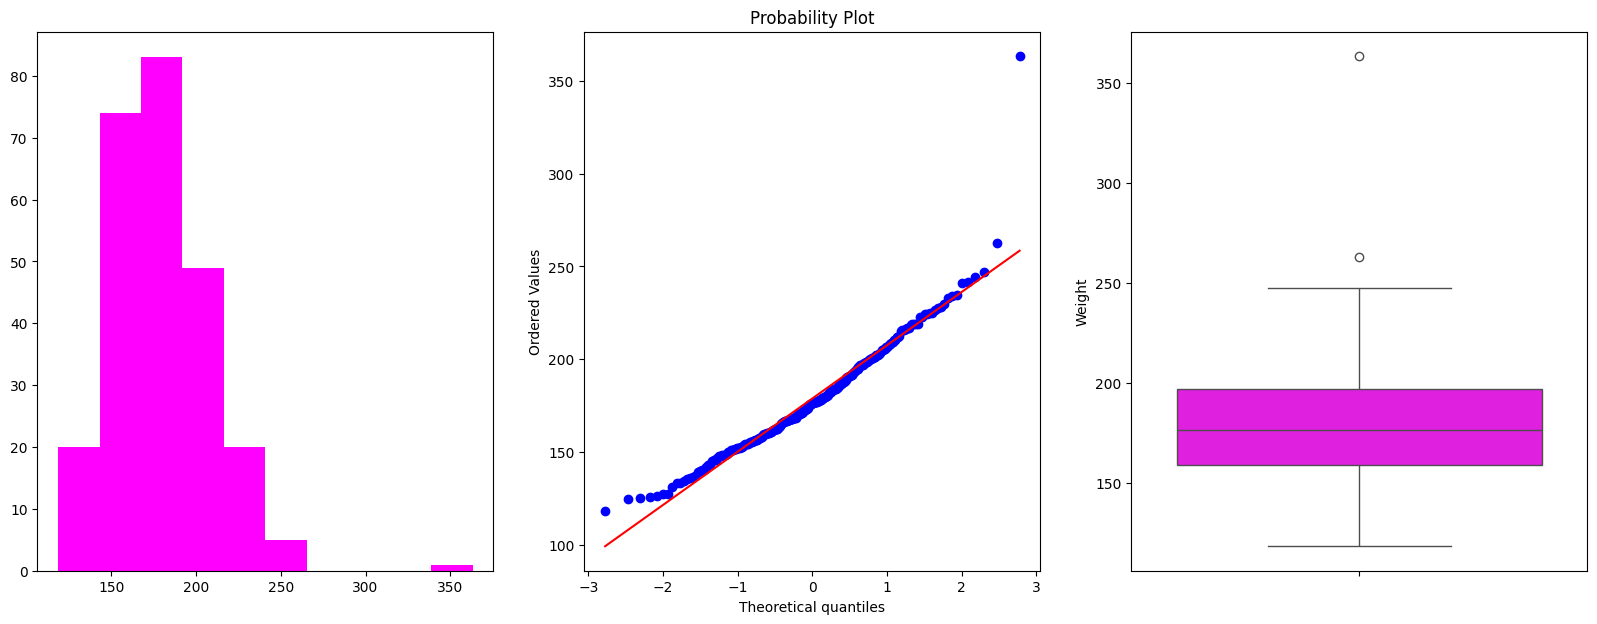

....................................................................................................
Distribution plots for the feature Height are shown below 


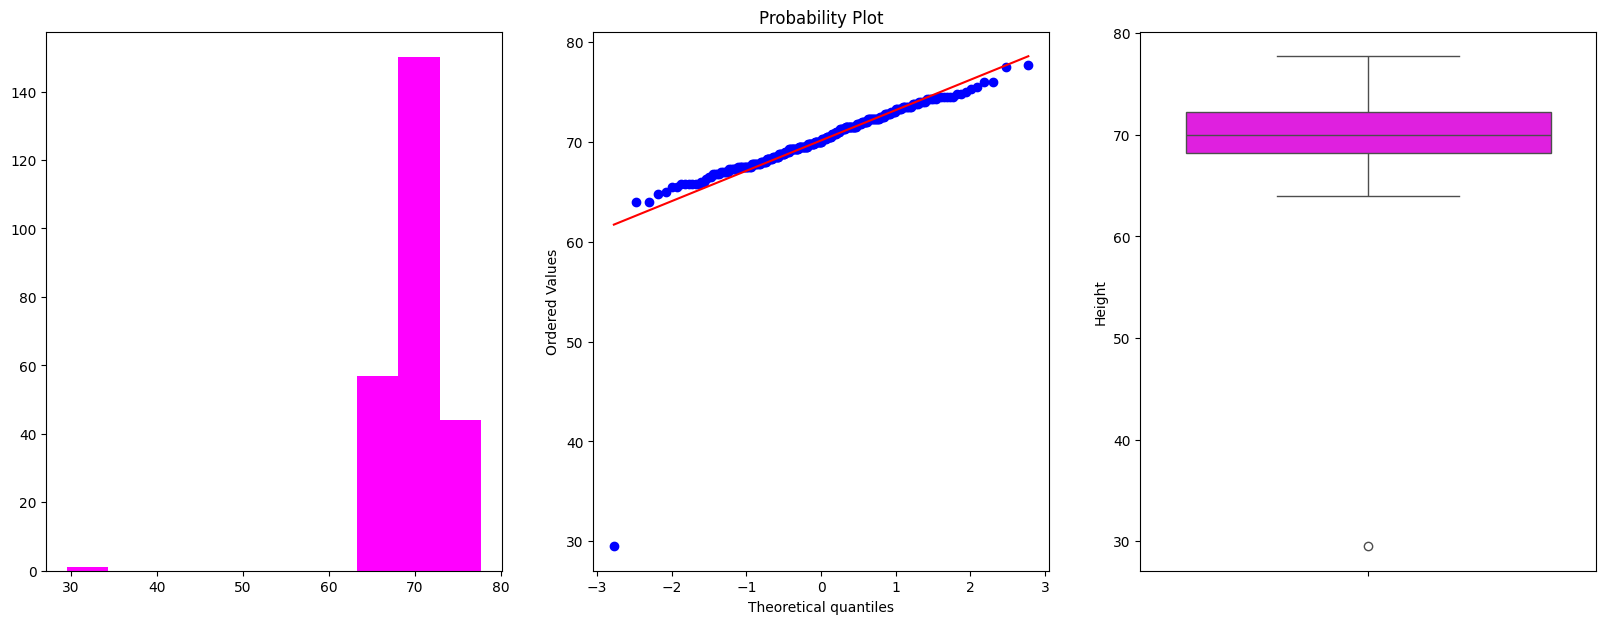

....................................................................................................
Distribution plots for the feature Neck are shown below 


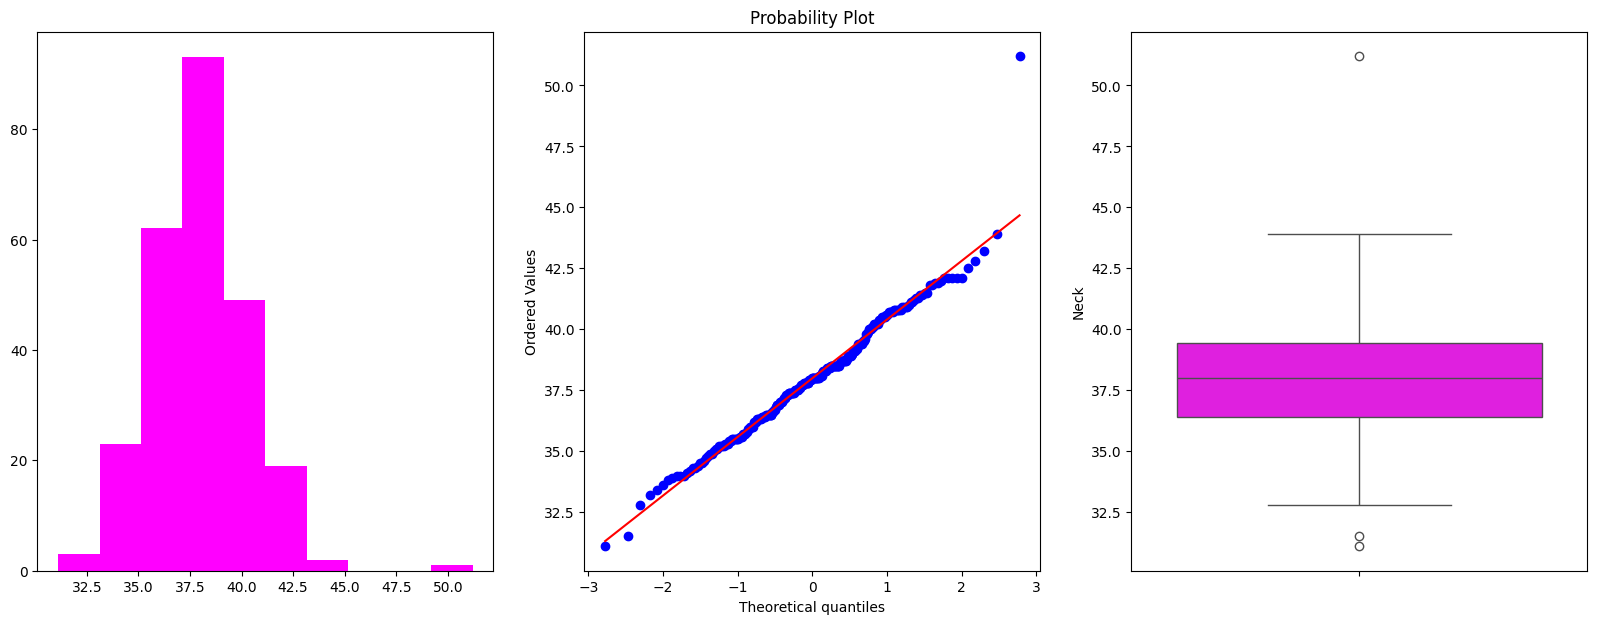

....................................................................................................
Distribution plots for the feature Chest are shown below 


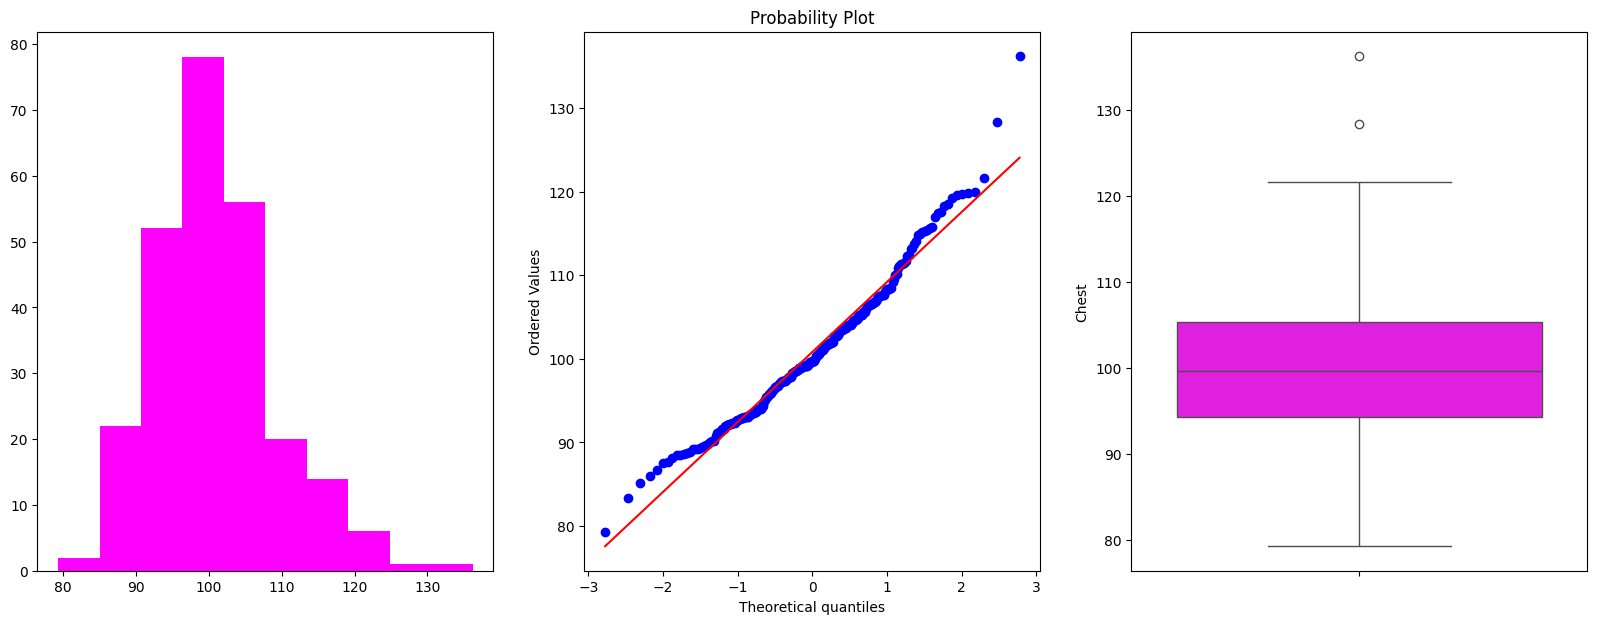

....................................................................................................
Distribution plots for the feature Abdomen are shown below 


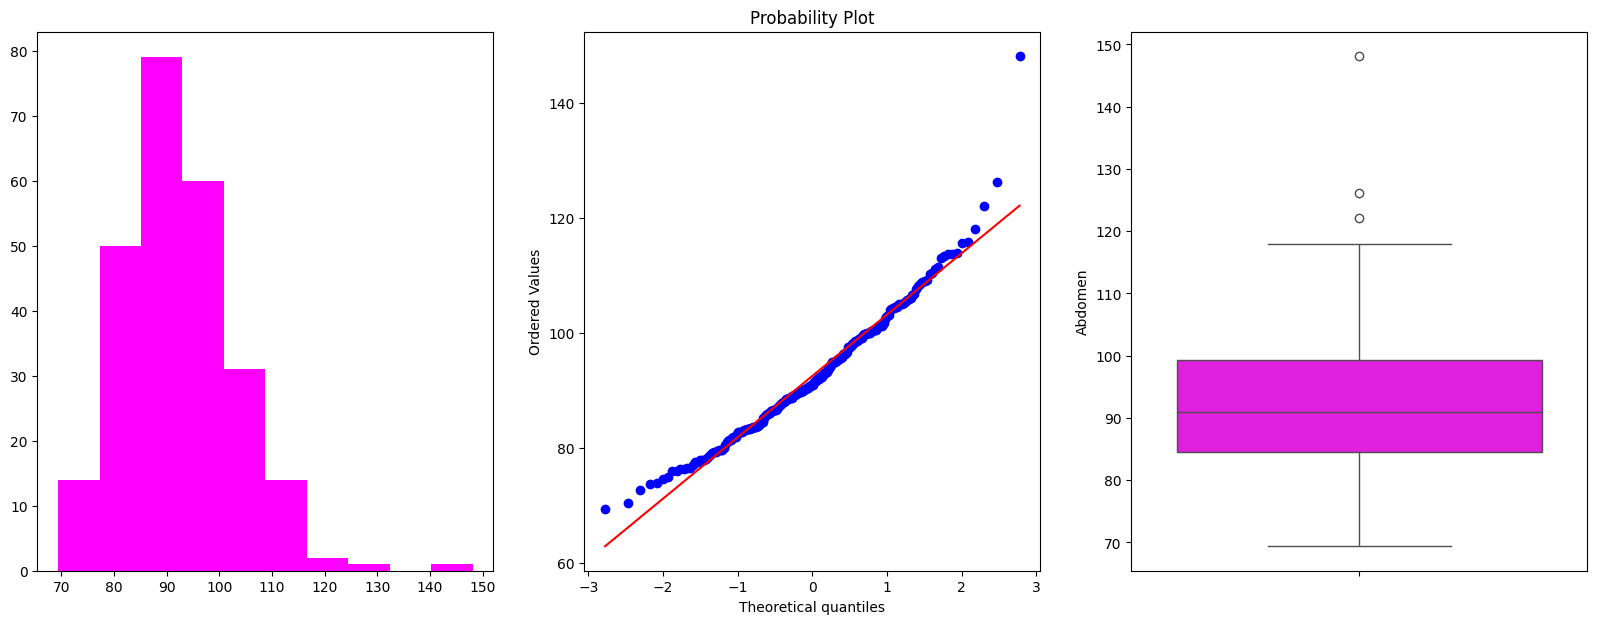

....................................................................................................
Distribution plots for the feature Hip are shown below 


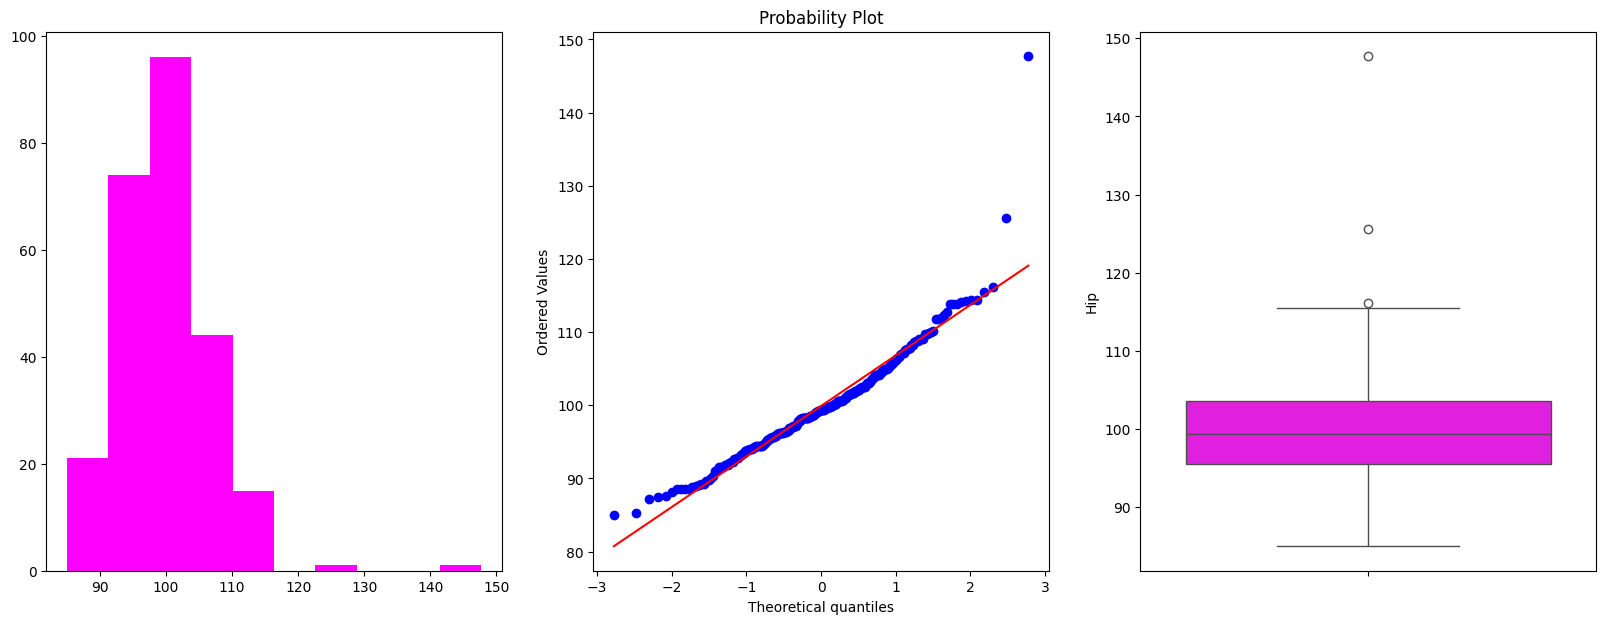

....................................................................................................
Distribution plots for the feature Thigh are shown below 


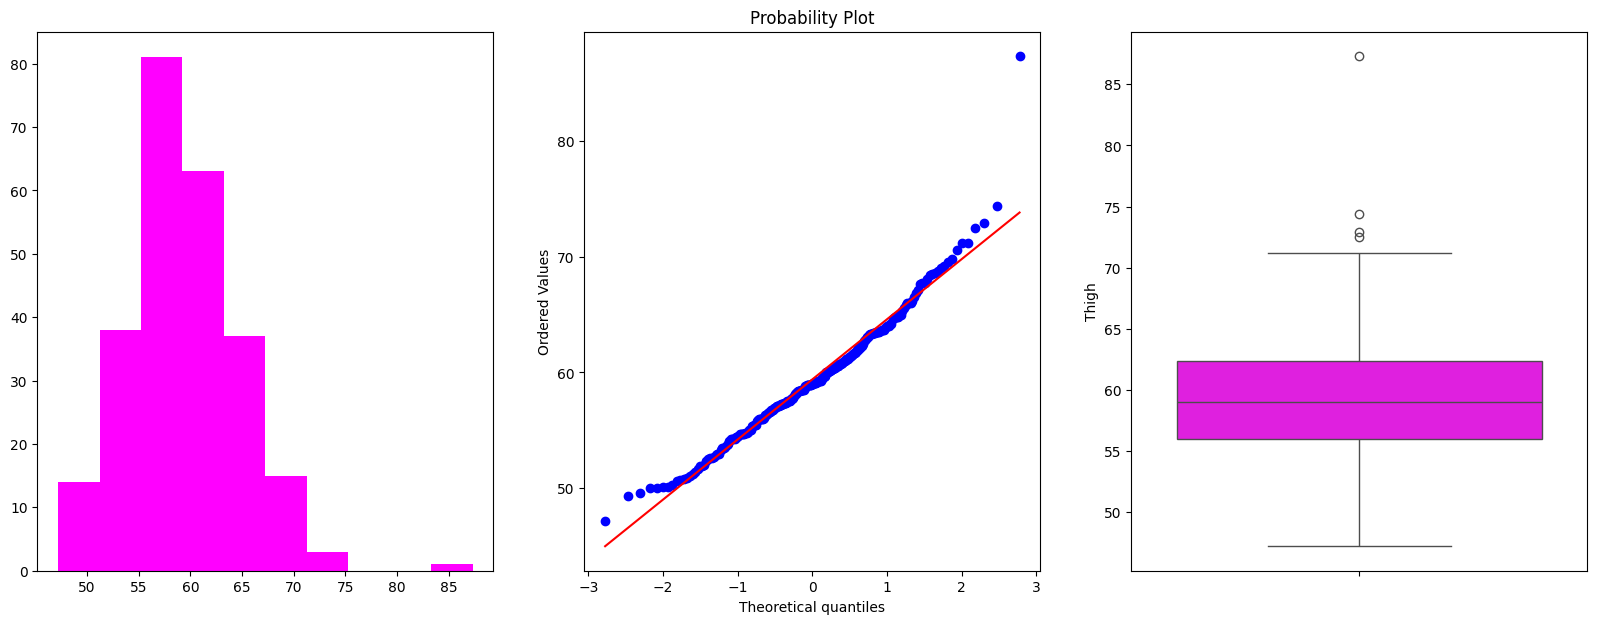

....................................................................................................
Distribution plots for the feature Knee are shown below 


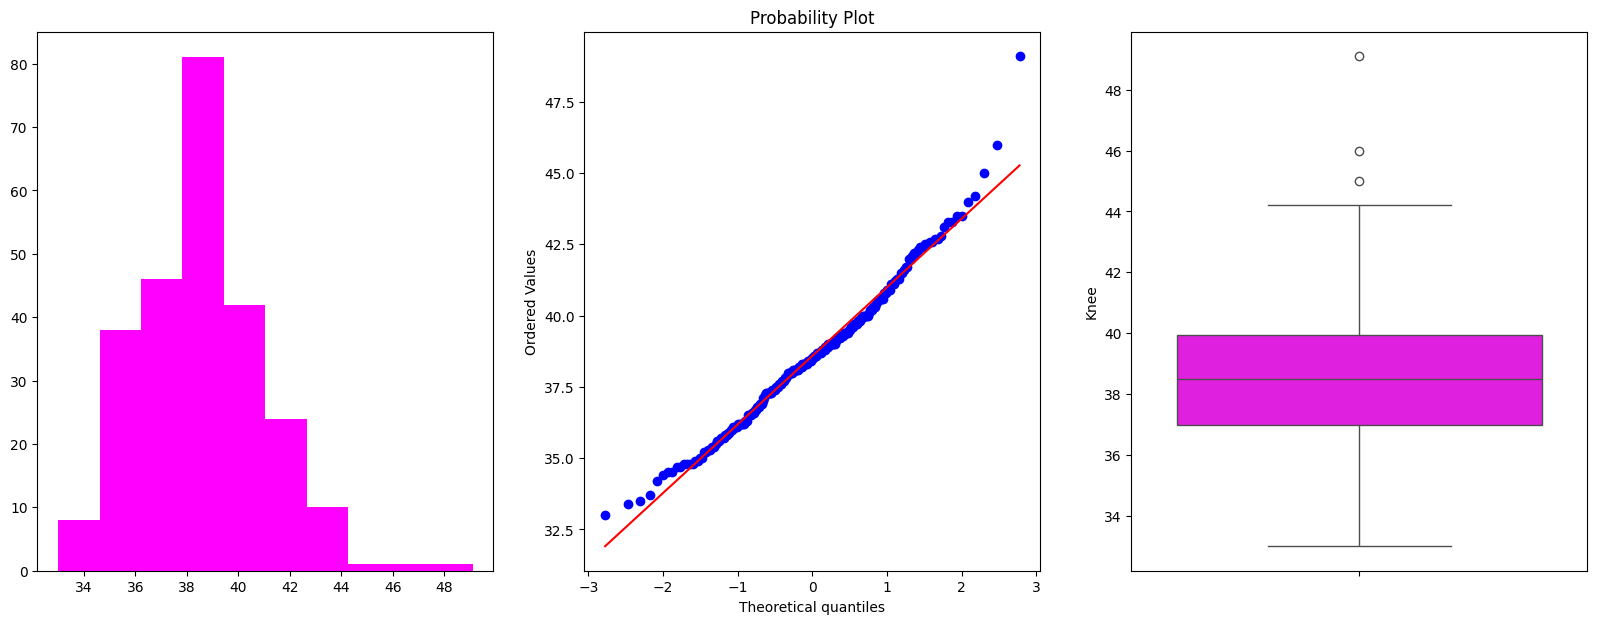

....................................................................................................
Distribution plots for the feature Ankle are shown below 


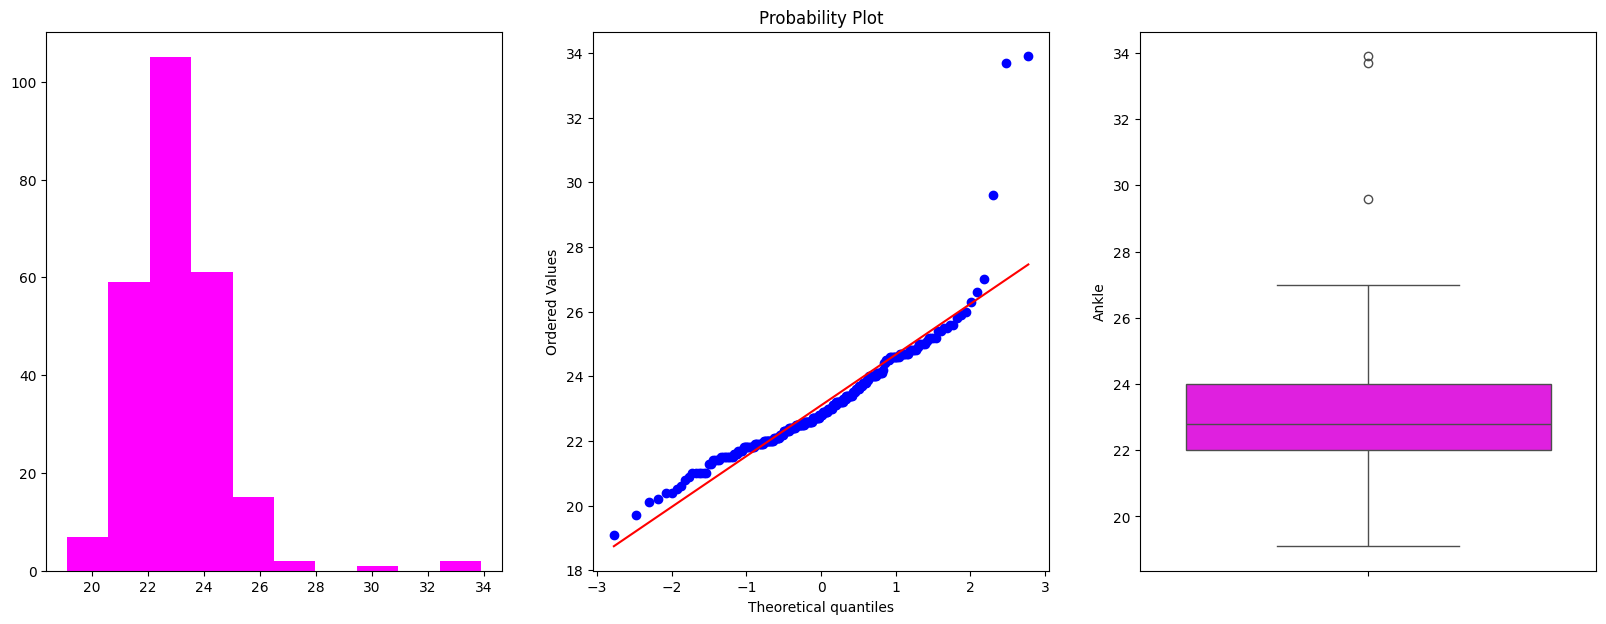

....................................................................................................
Distribution plots for the feature Biceps are shown below 


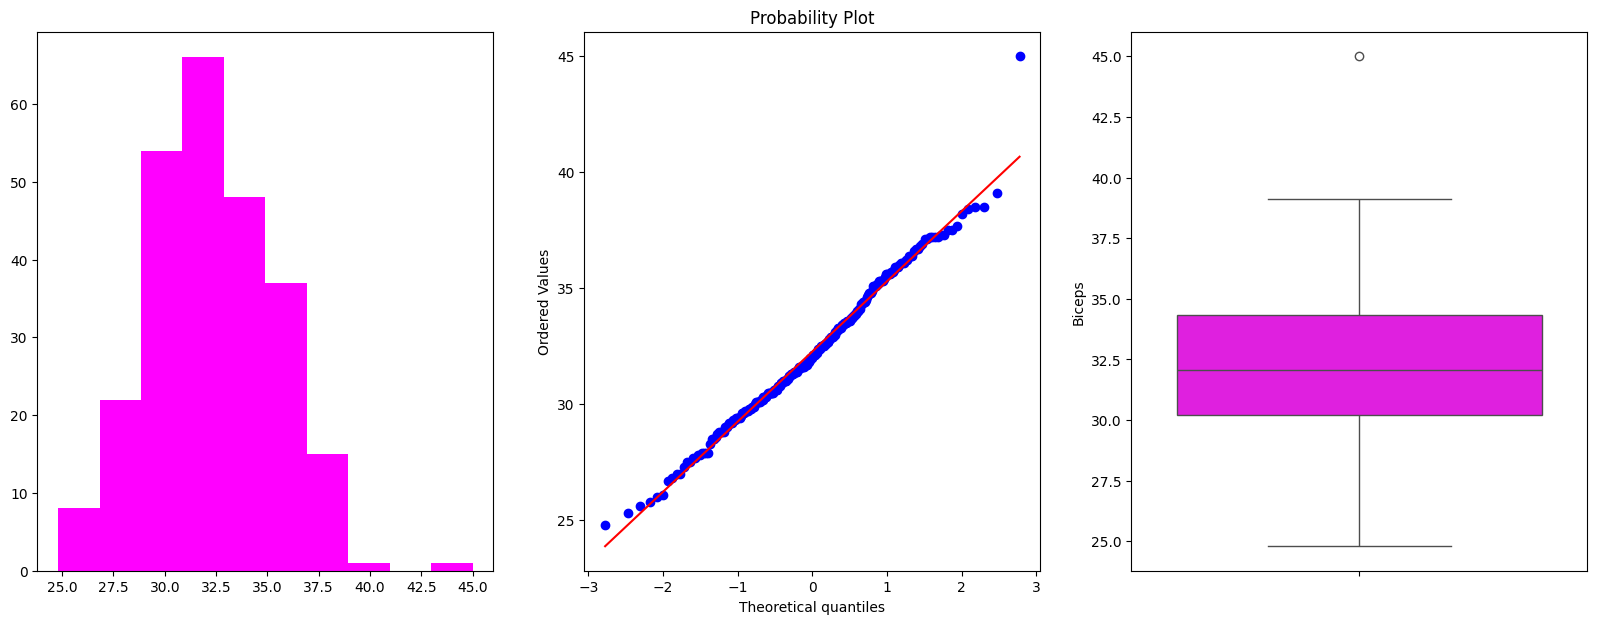

....................................................................................................
Distribution plots for the feature Forearm are shown below 


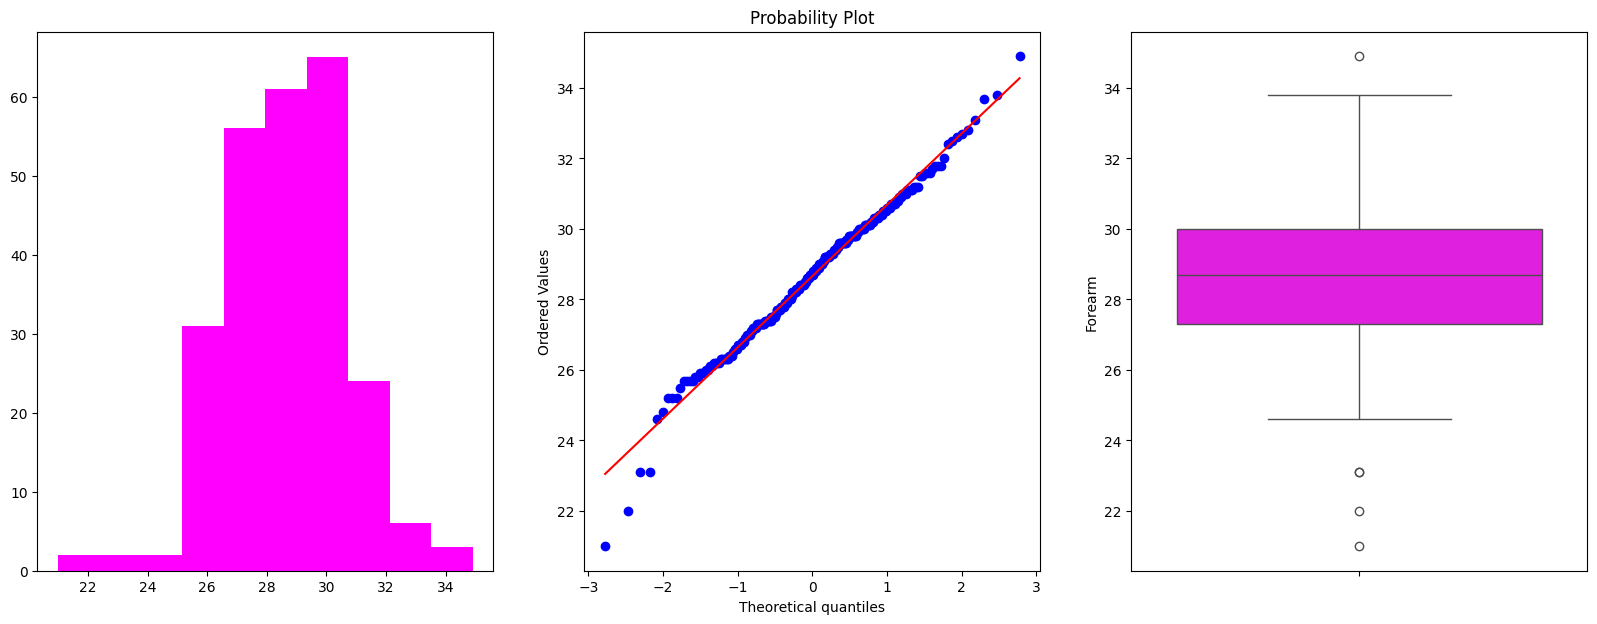

....................................................................................................
Distribution plots for the feature Wrist are shown below 


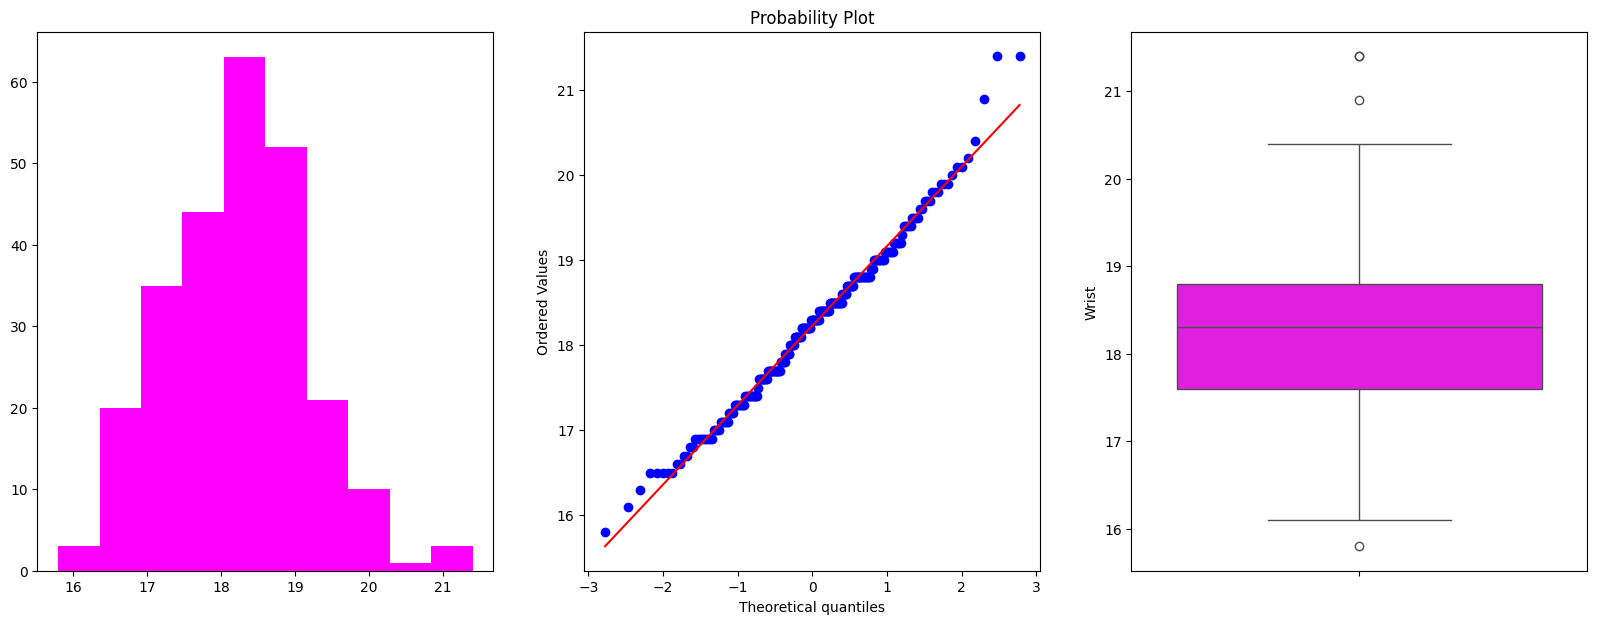

....................................................................................................


In [7]:
# function that plots the distribution
def draw_plots(df, col):
    
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color="magenta")
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(df[col], color="magenta")
    
    plt.show()
    
cols = list(df.columns)
for i in range(len(cols)):
    
    print(f"Distribution plots for the feature {cols[i]} are shown below ")
    
    draw_plots(df, cols[i])
    
    print("."*100)

In [8]:
upper_limit = []
lower_limit = []
for i in df.columns:
    upper_limit.append(df[i].mean() + (df[i].std())*4)
    lower_limit.append(df[i].mean() - (df[i].std())*4)

In [9]:
cols = list(df.columns)
j = 0
for i in range(len(cols)):
    
    temp = df.loc[(df[cols[i]]>upper_limit[j])&(df[cols[i]]<lower_limit[j])]
    j += 1

In [10]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


## Feature Selection 

We will be trying various feature selection techniques to select the most relevant features in our data set.

### ExtraTrees Regressor Feature Selection

We will be using **ExtraTress Regressor** for Feature Selection

In [11]:
# We will create a copy of the data frame
data = df.copy()

# get the target label
y = data["BodyFat"]

# get the predictive varable
X = data.drop(columns=["BodyFat"])

In [12]:
# import ExtraTrees Regressor
from sklearn.ensemble import ExtraTreesRegressor

# instantiate ExtrareeRegressor
er = ExtraTreesRegressor()

# Fit the Features and target labels
er.fit(X, y)

ExtraTreesRegressor()

In [13]:
# get the feature importances into a pandas series
series = pd.Series(er.feature_importances_, index=X.columns)
series

Density    0.719210
Age        0.002116
Weight     0.010779
Height     0.003509
Neck       0.005088
Chest      0.055321
Abdomen    0.169588
Hip        0.017614
Thigh      0.004270
Knee       0.006585
Ankle      0.000872
Biceps     0.002154
Forearm    0.000756
Wrist      0.002137
dtype: float64

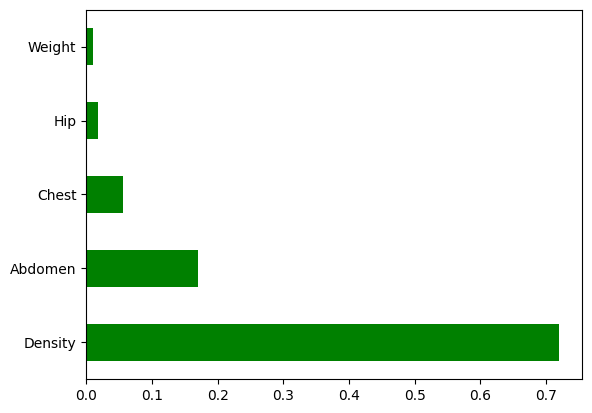

In [14]:
# plot a graph of the top 5 feature importance scores
series.nlargest(5).plot(kind="barh", color="green");

In [15]:
# import mutual info regression
from sklearn.feature_selection import mutual_info_regression

# instanciate mutual_info_regression
mr = mutual_info_regression(X, y)

<Axes: >

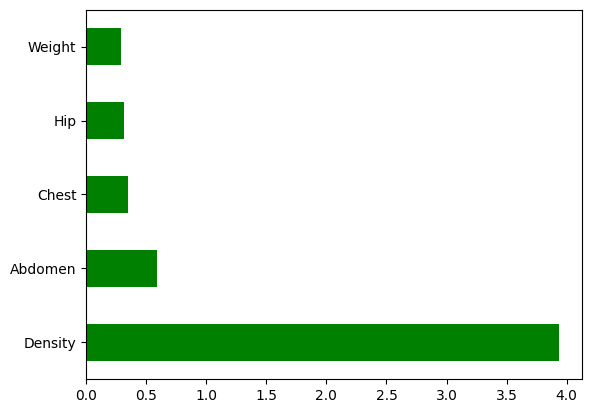

In [16]:
plot_data = pd.Series(mr, index=X.columns)
plot_data.nlargest(5).plot(kind="barh", color="green")

In [17]:
#
data 

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


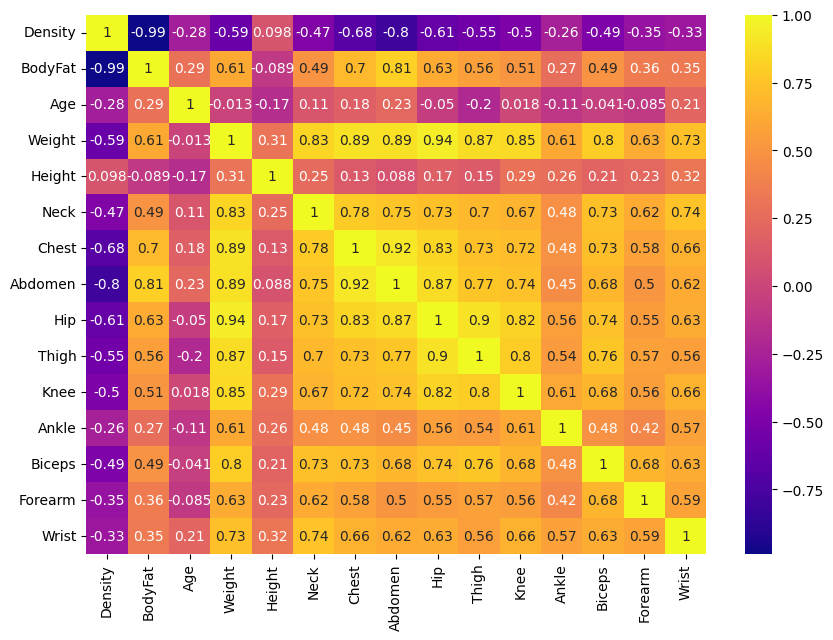

In [18]:
# Plot correlation map
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="plasma");

In [19]:
# defin a correlation threshold function function 
def correlation(df, threshold):
    
    col_cor = set()
    
    cor_mat = df.corr()
    
    for i in range(len(cor_mat)):
        
         for j in range(i):
                
                '''
                for each cell, get the value of that cell by 
                .loc[i][j], where i is th row and j is the col. 
                If the absolute value is greater that the threshold, 
                get the colum_name and add it in the set
                '''
                
                if abs(cor_mat.iloc[i][j]) > threshold:
                    col_name = cor_mat.columns[i]
                    col_cor.add(col_name)
                    
    return col_cor

ans = correlation(X, threshold=0.85)  

ans

C:\Users\MD IMRAN\AppData\Local\Temp\ipykernel_19860\1722667071.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cor_mat.iloc[i][j]) > threshold:


{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [20]:
X.corr()[['Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh']]

,Abdomen,Chest,Hip,Knee,Thigh
Density,-0.798955,-0.682599,-0.609331,-0.495040,-0.553091
Age,0.230409,0.176450,-0.050332,0.017516,-0.200096
Weight,0.887995,0.894191,0.940884,0.853167,0.868694
Height,0.087813,0.134892,0.170394,0.286053,0.148436
Neck,0.754077,0.784835,0.734958,0.672405,0.695697
Chest,0.915828,1.000000,0.829420,0.719496,0.729859
Abdomen,1.000000,0.915828,0.874066,0.737179,0.766624
Hip,0.874066,0.829420,1.000000,0.823473,0.896410
Thigh,0.766624,0.729859,0.896410,0.799170,1.000000
Knee,0.737179,0.719496,0.823473,1.000000,0.799170


In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
# copy data
temp = data[list(data.columns)]
info = pd.DataFrame()

# Get varianve importance score
info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])] 
info["Columns"] = temp.columns
info

,VIF,Columns
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [23]:
info.sort_values(by="VIF", ascending=False)

,VIF,Columns
0,3695.622377,Density
8,2933.636131,Hip
6,1374.457425,Chest
14,1349.973920,Wrist
7,1332.624257,Abdomen
3,1238.097164,Weight
10,1187.890413,Knee
5,1081.965633,Neck
9,1017.257501,Thigh
4,613.410514,Height


In [24]:
col_1 = list(series.nlargest(5).index)
col_2 = list(plot_data.nlargest(5).index)

col_1, col_2

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

In [25]:
to_train = X[col_1]
to_train.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25


## Model Building

In [26]:
# Import modules to build model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics 
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 

In [27]:
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(to_train, 
                                                    y, 
                                                    test_size=0.2)

In [28]:
X_train.shape, X_test.shape

((201, 5), (51, 5))

In [29]:
# Build a decision tree model 
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

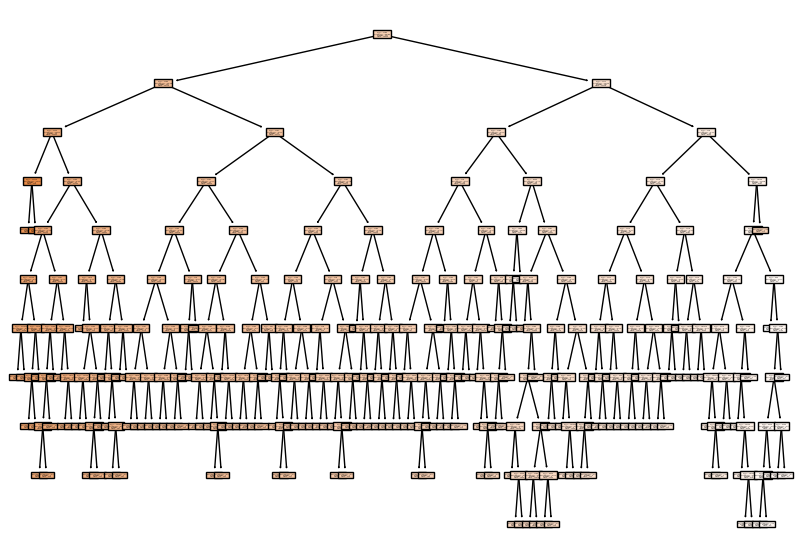

In [30]:
# Plot tree
plt.figure(figsize=(10, 7))
tree.plot_tree(reg, filled=True);

In [31]:
# prune the decision tree
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [32]:
# train different models with different ccp_alpha values
alpha_list = []
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(X_train, y_train)
    alpha_list.append(reg)

In [33]:
# get the train and test scores
train_score = [alpha_list[i].score(X_train, y_train) for i in range(len(alpha_list))]

test_score = [alpha_list[i].score(X_test, y_test) for i in range(len(alpha_list))]

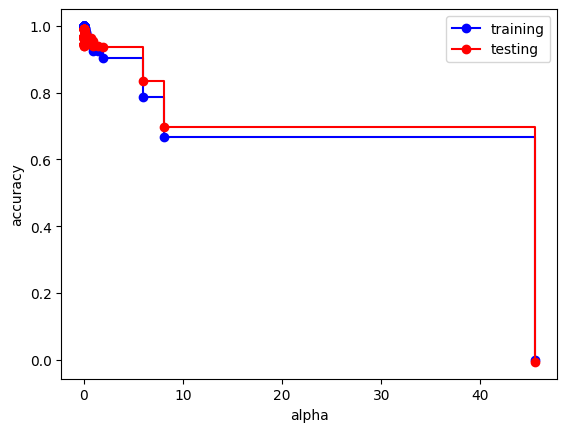

In [34]:
# Plot the train and test scores
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alpha, train_score, marker="o", label="training", 
        color="blue", drawstyle="steps-post")
plt.plot(ccp_alpha, test_score, marker="o", label="testing", 
        color="red", drawstyle="steps-post");
plt.legend();

In [35]:
# Normal approach
clf = DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Decision Tree Base Model: {metrics.r2_score(y_test, y_pred)}")

Decision Tree Base Model: 0.9395561255556544


In [36]:
# Random Forest
rf_base = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf_base.fit(np.array(X_train), y_train)
y_pred_rf = rf_base.predict(np.array(X_test))
print(f"Random Forest Base Model: {metrics.r2_score(y_test, y_pred_rf)} ")

Random Forest Base Model: 0.9847880824648322 


In [37]:
# get the values for hyperparameter tuning
params = {
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [int(x) for x in np.linspace(start=1, stop=1200, num=10)], 
            "criterion": ["squared_error", "absolute_error"],
            "max_depth": [int(x) for x in np.linspace(start=1, stop=30, num=5)], 
            "min_samples_split": [2,5,10,12], 
            "min_samples_leaf": [2,5,10,12], 
            "max_features": ["auto", "sqrt"], 
            "ccp_alpha":[1,2,2.5,3,3.5,4,5]     
        }
    },
    
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion": ["squared_error", "absolute_error"], 
            "splitter": ["best", "random"], 
            "min_samples_split": [1,2,5,10,12], 
            "max_features": ["auto", "sqrt"], 
            "ccp_alpha":[1,2,2.5,3,3.5,4,5]
        }
    }, 
    
    "SVM": {
        "model": SVR(),
        "params": {
            "C": [0.25, 0.5, 0.75, 1.0], 
            "tol": [1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75], 
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid'], 
            "max_iter": [int(x) for x in np.linspace(start=1, stop=250, num=10)]
        }
    }
}

In [38]:
# Execute RandomizedSearchCV and get best parameters
scores = []
for model_name, model_params in params.items():
    clf = RandomizedSearchCV(model_params["model"],
                            param_distributions=model_params["params"], 
                            cv=5, n_jobs=-1, n_iter=10, 
                            scoring="neg_mean_squared_error")
    
    clf.fit(X_train, y_train)
    scores.append({
        "model_name": model_name, 
        "best_score": clf.best_score_, 
        "best_estimator": clf.best_estimator_
    })

c:\Users\MD IMRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MD IMRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MD IMRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\MD IMRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

In [39]:
# view scores
scores

[{'model_name': 'RandomForest',
  'best_score': -22.136372871900015,
  'best_estimator': RandomForestRegressor(ccp_alpha=3.5, max_depth=8, max_features='sqrt',
                        min_samples_leaf=2, min_samples_split=10, n_estimators=1)},
 {'model_name': 'DecisionTree',
  'best_score': -20.452883223898308,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=5, max_features='sqrt', min_samples_split=5)},
 {'model_name': 'SVM',
  'best_score': -27.67346138491921,
  'best_estimator': SVR(C=0.25, kernel='linear', max_iter=250, tol=0.025)}]

In [40]:
# create a data frame of the scores
scored_df = pd.DataFrame(scores, columns=["model_name", 
                                          "best_score", 
                                          "best_estimator"])

scored_df

,model_name,best_score,best_estimator
0,RandomForest,-22.136373,"(DecisionTreeRegressor(ccp_alpha=3.5, max_dept..."
1,DecisionTree,-20.452883,"DecisionTreeRegressor(ccp_alpha=5, max_feature..."
2,SVM,-27.673461,"SVR(C=0.25, kernel='linear', max_iter=250, tol..."


In [41]:
scores[0]["best_estimator"]

RandomForestRegressor(ccp_alpha=3.5, max_depth=8, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10, n_estimators=1)

In [42]:
# train the model with best parameters
rf = scores[0]["best_estimator"]
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"Random Forest hyperparameter Model: {metrics.r2_score(y_test, y_pred)} ")

Random Forest hyperparameter Model: 0.7591449846896257 


In [43]:
# Now we will train the best model with the entire data set
to_train_list = np.array(to_train)

predicted = []
for i in range(len(to_train_list)):
    predicted.append(rf_base.predict(to_train_list[i].reshape(1, -1)))
    
to_train["Actual"] = y 
to_train["Predicted Result"] = np.array(predicted)
to_train

C:\Users\MD IMRAN\AppData\Local\Temp\ipykernel_19860\4067653651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_train["Actual"] = y
C:\Users\MD IMRAN\AppData\Local\Temp\ipykernel_19860\4067653651.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_train["Predicted Result"] = np.array(predicted)


,Density,Abdomen,Chest,Hip,Weight,Actual,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.545871
1,1.0853,83.0,93.6,98.7,173.25,6.1,7.037895
2,1.0414,87.9,95.8,99.2,154.00,25.3,25.471341
3,1.0751,86.4,101.8,101.2,184.75,10.4,9.856137
4,1.0340,100.0,97.3,101.9,184.25,28.7,29.348712
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,10.328469
248,1.0236,105.0,108.5,104.5,201.00,33.6,32.178610
249,1.0328,111.5,111.1,101.7,186.75,29.3,30.002148
250,1.0399,101.3,108.3,97.8,190.75,26.0,25.832362


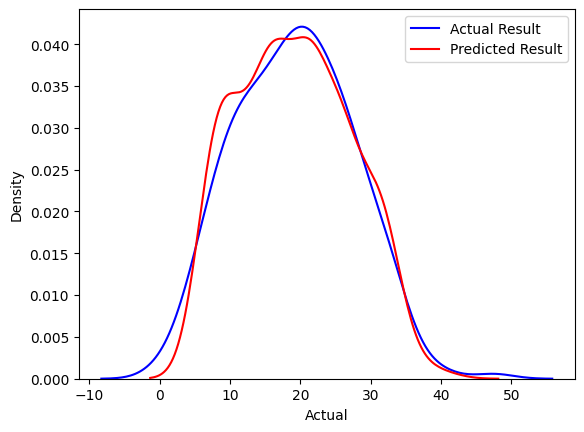

In [44]:
# plot the kde for both the actual and predicted results
sns.kdeplot(to_train["Actual"], 
            label="Actual Result", 
            color="blue")
sns.kdeplot(to_train["Predicted Result"], 
            label="Predicted Result", 
            color="red")
plt.legend();

In [45]:
# save the model
import pickle
file = open("bodyfatmodell.pkl", "wb")
pickle.dump(rf_base, file)
file.close()